Disease Prediction from metagenomic data

In [ ]:
#Load cirhossis feature dataset

import pandas as pd
df = pd.read_csv("/content/Cirrhosis_x_filtered.csv")
df.set_index('sampleID',inplace=True)
df

,HD10,HD11,HD12,HD13,HD14,HD15,HD16,HD17,HD18,HD19,HD1,HD20,HD21,HD22,HD23,HD24,HD25,HD26,HD27,HD28,HD29,HD2,HD30,HD31,HD32,HD33,HD34,HD35,HD36,HD37,HD38,HD39,HD3,HD40,HD41,HD42,HD43,HD44,HD45,HD46,...,LD84,LD85,LD86,LD87,LD88,LD89,LD8,LD90,LD91,LD92,LD93,LD94,LD95,LD96,LD97,LD98,LD9,LV10,LV11,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV1,LV20,LV21,LV22,LV23,LV24,LV25,LV2,LV3,LV4,LV5,LV6,LV7,LV8
sampleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acidobacteria,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Actinobacteria,0.06939,0.22683,0.27806,0.17676,0.32151,0.08538,0.14794,5.93298,0.65041,0.08471,0.21865,0.35118,0.08206,0.08804,0.23975,0.18631,0.24682,1.00705,0.10724,0.14119,1.30486,0.00000,0.53586,2.62474,1.09926,0.39939,2.68625,1.02278,0.31441,0.30370,0.27343,0.29863,0.08316,0.11577,0.07692,0.33372,0.08422,0.06935,0.05545,0.53191,...,0.07286,1.36276,0.23795,0.39608,2.48223,0.00989,11.72155,1.70032,1.35946,0.08457,0.28793,0.07597,0.04496,0.16951,0.10951,0.06838,0.05426,0.03250,0.09966,0.22784,1.57961,0.03037,2.14194,0.03989,0.09070,0.40645,0.29591,1.81645,1.97018,0.28012,0.39506,0.15755,1.55896,5.62893,0.80514,0.08956,0.46202,0.23399,0.30147,0.26143
Bacteroidetes,68.27343,41.64453,59.53682,65.24800,81.43032,62.76020,40.89402,56.26499,32.41607,50.74284,73.10285,13.00306,50.99148,31.38253,69.60861,72.56624,70.49974,30.55312,61.39528,54.28792,53.94235,56.00257,72.53424,61.06182,47.96587,57.06923,65.84676,33.74114,52.86276,42.11444,57.10129,60.37767,79.66629,48.96835,66.07446,83.78919,71.91028,83.82084,73.78616,72.64776,...,59.92194,46.34506,35.68897,69.00970,13.69544,59.14159,40.87960,37.64222,28.59840,49.49667,44.29725,50.97600,79.50079,38.20729,59.39478,50.19078,65.43575,4.38096,55.71668,50.75586,62.66757,26.35314,10.24801,83.21312,11.59006,0.88699,73.55285,51.31355,45.89486,1.82928,75.04315,55.62675,70.64057,30.46814,43.53386,81.27410,76.08831,65.41576,73.53751,53.68634
Firmicutes,24.42702,47.45908,36.77055,33.31465,15.57918,28.27095,57.70956,34.48676,42.10696,43.92795,24.46164,74.74173,34.39407,67.40816,26.95278,20.94165,8.68736,67.82845,31.45846,43.62927,40.35058,38.67210,24.17060,34.79776,48.95395,40.31424,29.05481,54.15134,26.13207,46.43863,42.14415,37.41840,16.24009,47.91409,31.03467,12.15910,23.57103,15.04333,12.44966,25.41822,...,31.79565,47.70315,56.18479,19.91370,34.82577,26.69625,39.32941,48.17909,67.22553,31.72989,47.82068,39.21202,18.96640,30.63979,39.40841,27.54195,24.67893,92.57654,40.12555,39.10653,33.28170,25.58712,85.76708,11.57387,51.77503,62.30206,14.23689,32.91243,49.21711,37.76773,15.75883,38.70990,23.27987,54.73242,48.06447,11.71843,14.62777,22.57098,21.96044,33.55587
Fusobacteria,1.44325,0.00000,0.72808,0.00000,0.04214,0.00000,0.00265,0.00999,0.00411,3.69786,0.12674,0.22601,14.24734,0.02417,0.00000,2.25979,0.00000,0.00000,0.66279,0.00000,1.12582,0.00000,0.00000,0.47535,0.00000,0.00000,0.00000,0.00000,0.00000,0.13437,0.18146,0.57992,2.14486,0.00000,0.00000,0.00000,0.00000,0.09428,0.51492,0.00000,...,0.70416,0.01077,0.05491,3.18445,0.46075,3.48583,0.00756,0.38052,0.02392,5.15664,0.02692,3.95201,0.05644,1.14689,0.01831,14.78129,0.23887,0.01504,0.00939,3.24515,0.00000,0.14731,0.23008,0.36018,22.34547,1.03526,4.17479,3.40495,0.15908,0.00000,0.00000,0.07774,0.16151,0.06155,0.08899,0.00000,0.30702,7.38384,0.30329,2.27562
Proteobacteria,5.78351,2.14402,2.68167,1.24195,2.62084,8.88347,1.24582,

In [ ]:
# Transpose feature dataset

df_t = df.transpose() # transpose data
df_t

sampleID,Acidobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Tenericutes,Verrucomicrobia,Candidatus_Saccharibacteria,Deinococcus_Thermus,Synergistetes
HD10,0.0,0.06939,68.27343,24.42702,1.44325,5.78351,0.0,0.0,0.00340,0.0,0.00000,0.000
HD11,0.0,0.22683,41.64453,47.45908,0.00000,2.14402,0.0,0.0,8.52552,0.0,0.00000,0.000
HD12,0.0,0.27806,59.53682,36.77055,0.72808,2.68167,0.0,0.0,0.00481,0.0,0.00000,0.000
HD13,0.0,0.17676,65.24800,33.31465,0.00000,1.24195,0.0,0.0,0.01864,0.0,0.00000,0.000
HD14,0.0,0.32151,81.43032,15.57918,0.04214,2.62084,0.0,0.0,0.00000,0.0,0.00602,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
LV4,0.0,0.08956,81.27410,11.71843,0.00000,6.91288,0.0,0.0,0.00503,0.0,0.00000,0.000
LV5,0.0,0.46202,76.08831,14.62777,0.30702,8.51489,0.0,0.0,0.00000,0.0,0.00000,0.000
LV6,0.0,0.23399,65.41576,22.57098,7.38384,4.39545,0.0,0.0,0.00000,0.0,0.00000,0.000
LV7,0.0,0.30147,73.53751,21.96044,0.30329,3.88969,0.0,0.0,0.00060,0.0,0.00000,0.007


In [ ]:
#load cirrhosis label dataset
df2 = pd.read_csv("/content/Cirrhosis_y.csv")
df2.set_index('sampleID',inplace=True)
df2

,disease
sampleID,
HD10,0
HD11,0
HD12,0
HD13,0
HD14,0
...,...
LV4,1
LV5,1
LV6,1


In [ ]:
# merge features and label into one dataframe
df_merge = df_t.join(df2)
df_merge

,Acidobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Tenericutes,Verrucomicrobia,Candidatus_Saccharibacteria,Deinococcus_Thermus,Synergistetes,disease
HD10,0.0,0.06939,68.27343,24.42702,1.44325,5.78351,0.0,0.0,0.00340,0.0,0.00000,0.000,0
HD11,0.0,0.22683,41.64453,47.45908,0.00000,2.14402,0.0,0.0,8.52552,0.0,0.00000,0.000,0
HD12,0.0,0.27806,59.53682,36.77055,0.72808,2.68167,0.0,0.0,0.00481,0.0,0.00000,0.000,0
HD13,0.0,0.17676,65.24800,33.31465,0.00000,1.24195,0.0,0.0,0.01864,0.0,0.00000,0.000,0
HD14,0.0,0.32151,81.43032,15.57918,0.04214,2.62084,0.0,0.0,0.00000,0.0,0.00602,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LV4,0.0,0.08956,81.27410,11.71843,0.00000,6.91288,0.0,0.0,0.00503,0.0,0.00000,0.000,1
LV5,0.0,0.46202,76.08831,14.62777,0.30702,8.51489,0.0,0.0,0.00000,0.0,0.00000,0.000,1
LV6,0.0,0.23399,65.41576,22.57098,7.38384,4.39545,0.0,0.0,0.00000,0.0,0.00000,0.000,1
LV7,0.0,0.30147,73.53751,21.96044,0.30329,3.88969,0.0,0.0,0.00060,0.0,0.00000,0.007,1


In [ ]:
#statistics of each column in data
df_merge.describe()

,Acidobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Tenericutes,Verrucomicrobia,Candidatus_Saccharibacteria,Deinococcus_Thermus,Synergistetes,disease
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.000077,0.917644,53.970352,36.576397,0.856051,6.810626,0.001571,0.000790,0.816028,0.000766,0.000596,0.018453,0.508621
std,0.001041,1.767492,19.021374,16.453662,2.441951,10.580219,0.023923,0.008596,4.686068,0.003755,0.002081,0.128531,0.501007
min,0.000000,0.000000,0.886990,1.716180,0.000000,0.121440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.125635,42.995503,24.655582,0.000247,1.862640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.285370,54.985295,36.073365,0.051775,3.452260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.853243,66.607085,46.018197,0.521865,7.650197,0.000000,0.000000,0.026868,0.000000,0.000000,0.000000,1.000000
max,0.015710,13.734160,92.968500,92.576540,22.345470,93.082120,0.364380,0.111630,59.924060,0.050220,0.018040,1.551790,1.000000


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, HD10 to LV8
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Acidobacteria                232 non-null    float64
 1   Actinobacteria               232 non-null    float64
 2   Bacteroidetes                232 non-null    float64
 3   Firmicutes                   232 non-null    float64
 4   Fusobacteria                 232 non-null    float64
 5   Proteobacteria               232 non-null    float64
 6   Spirochaetes                 232 non-null    float64
 7   Tenericutes                  232 non-null    float64
 8   Verrucomicrobia              232 non-null    float64
 9   Candidatus_Saccharibacteria  232 non-null    float64
 10  Deinococcus_Thermus          232 non-null    float64
 11  Synergistetes                232 non-null    float64
 12  disease                      232 non-null    int64  
dtypes: float64(12), int64(

In [ ]:
# check if there is any missing data
df_merge[(df_merge.isna().any(axis=1))]

,Acidobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Tenericutes,Verrucomicrobia,Candidatus_Saccharibacteria,Deinococcus_Thermus,Synergistetes,disease


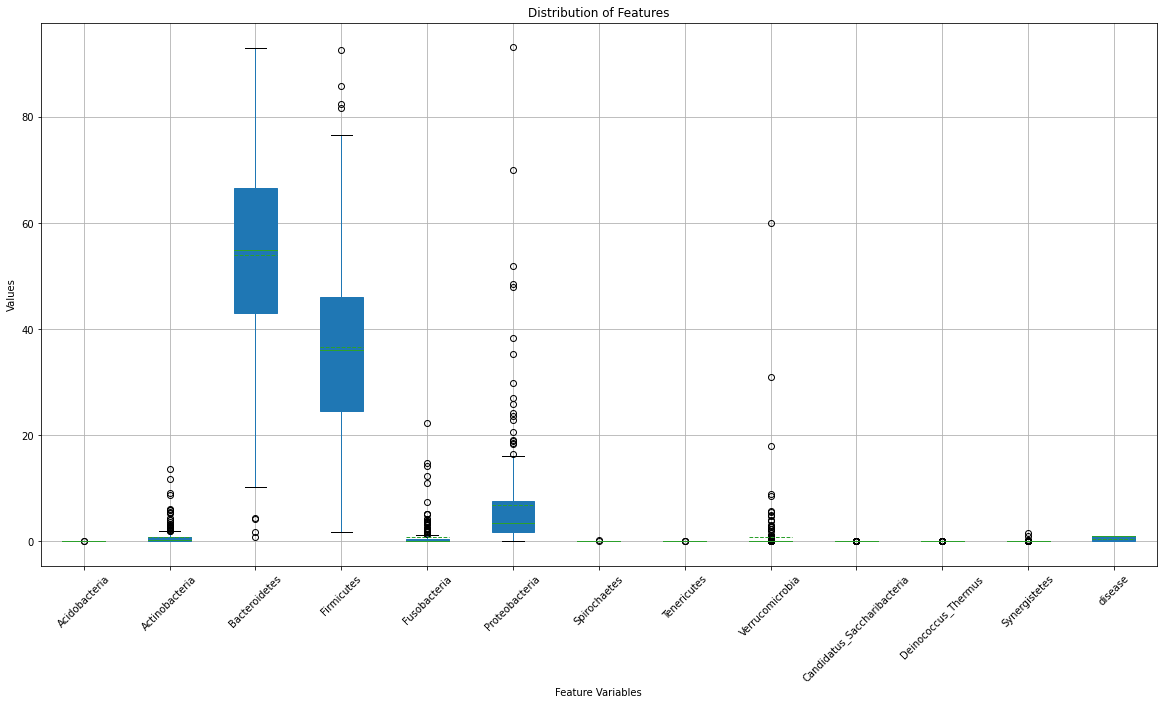

In [ ]:
#Visualize distribution of variables using boxplot.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
boxplot = df_merge.boxplot(patch_artist=True, meanline=True, showmeans=True)
plt.xticks(rotation = 45)
plt.xlabel('Feature Variables')
plt.ylabel('Values')
plt.title('Distribution of Features')
plt.show()

In [ ]:
# split into train and test datasets
from sklearn.model_selection import train_test_split

features = df_merge.drop(columns='disease')
labels = pd.DataFrame(df_merge['disease'])
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=23)
X_train.shape

(185, 12)

In [ ]:
y_train.shape

(185, 1)

In [ ]:
# data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # transform training data
X_test = scaler.transform(X_test) # transform testing data
X_train_scaled = pd.DataFrame(X_train, columns=features.columns)
X_train_scaled

,Acidobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Tenericutes,Verrucomicrobia,Candidatus_Saccharibacteria,Deinococcus_Thermus,Synergistetes
0,-0.083136,-0.512936,-1.453822,-0.642362,-0.275307,4.535690,-0.073749,-0.103243,-0.142832,-0.187323,-0.294024,-0.137376
1,1.775920,-0.506292,0.564740,-0.883763,-0.336604,-0.270147,-0.073749,-0.103243,1.811830,-0.187323,0.757099,0.459533
2,-0.083136,-0.408978,0.861798,-0.598412,-0.327886,-0.477607,-0.073749,-0.103243,-0.142832,-0.187323,-0.294024,-0.137376
3,-0.083136,-0.443472,1.151680,-1.036584,-0.333653,-0.270273,-0.073749,-0.103243,-0.142832,-0.187323,-0.294024,-0.137376
4,-0.083136,0.569968,-0.450265,0.744216,-0.270410,-0.402648,-0.073749,-0.103243,-0.123114,-0.187323,-0.294024,-0.131977
...,...,...,...,...,...,...,...,...,...,...,...,...
180,-0.083136,-0.406097,-0.814235,0.909255,1.390385,-0.170872,-0.073749,-0.103243,-0.142832,-0.187323,-0.294024,-0.137376
181,-0.083136,-0.482678,-0.265296,-0.281912,1.809099,0.782798,-0.073749,-0.103243,-0.142832,1.216370,-0.294024,-0.100343
182,-0.083136,-0.014790,0.825290,-0.542578,-0.336192,-0.578830,-0.073749,-0.103243,-0.142832,-0.187323,-0.294024,-0.137376
183,-0.083136,-0.361593,0.969311,-0.855171,-0.210403,-0.269284,-0.073749,-0.103243,-0.142700,-0.187323,-0.294024,-0.078326


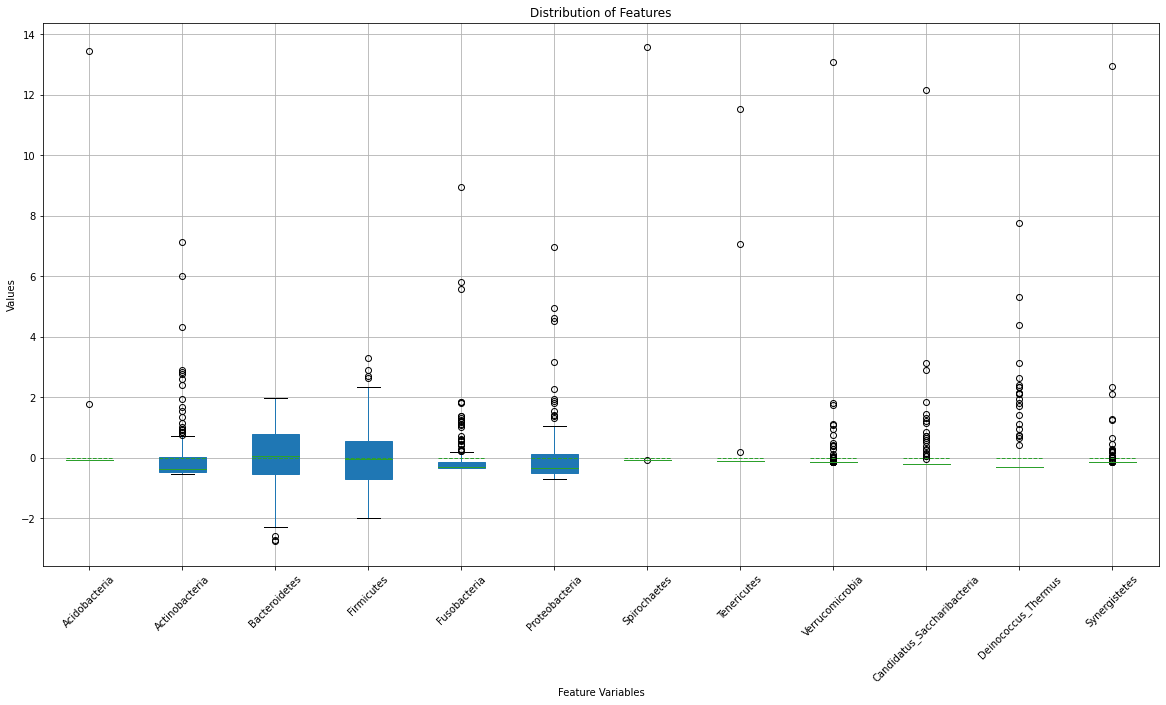

In [ ]:
#Visualize distribution of variables using boxplot after normalization.

plt.figure(figsize=(20,10))
boxplot = X_train_scaled.boxplot(patch_artist=True, meanline=True, showmeans=True)
plt.xticks(rotation = 45)
plt.xlabel('Feature Variables')
plt.ylabel('Values')
plt.title('Distribution of Features')
plt.show()

PCA Analysis

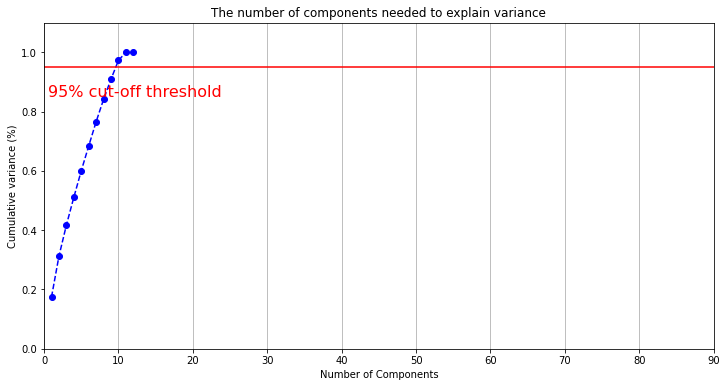

In [ ]:
# Get the information about the explained variance and plot the cumulative variance

from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 100, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In this case, to get 95% of variance explained I need 10 principal components.

In [ ]:
# Applying clustering analysis on the feature data to discover the patterns among samples

import numpy as np
from sklearn.cluster import KMeans

kmeans_model = KMeans(init='k-means++')
kmeans_model.fit(X_train)
train_cluster_labels  = kmeans_model.predict(X_train)
train_cluster_labels

array([0, 1, 1, 1, 0, 0, 0, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 7, 1, 1, 1, 1, 5, 1, 0, 0, 7, 1, 1, 1, 0, 1, 7, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 7, 0, 2, 1, 0, 0, 0, 1, 1, 0, 7, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 7, 1, 0, 0, 1, 1, 7, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 7, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       7, 1, 1, 7, 0, 0, 1, 1, 7, 0, 1, 1, 0, 1, 5, 0, 1, 0, 1, 1, 0, 1,
       1, 6, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 4, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)
pca_data = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", pca_data.shape)

original shape:    (185, 12)
transformed shape: (185, 10)


<Figure size 576x432 with 0 Axes>

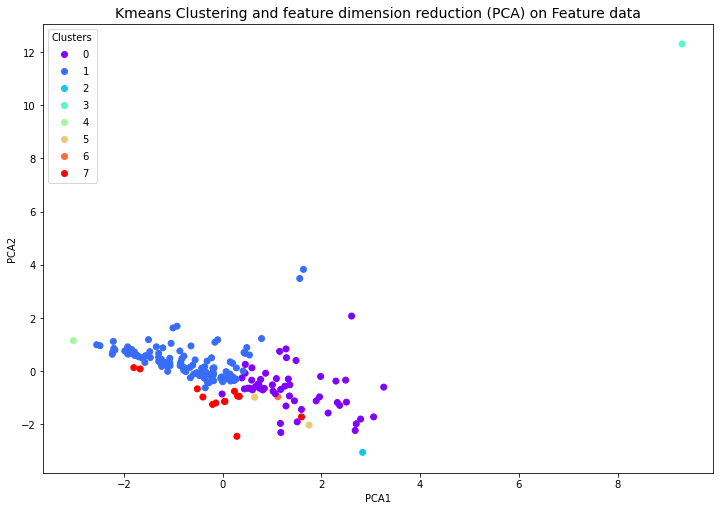

In [ ]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(bottom = 0.1)
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c= train_cluster_labels,label=train_cluster_labels,cmap=('rainbow'))
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Kmeans Clustering and feature dimension reduction (PCA) on Feature data",fontsize=14)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

XGBoost Model

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
xgb_acc = accuracy_score(y_test, xgb_pred )
xgb_prec = precision_score(y_test, xgb_pred )
xgb_recall = recall_score(y_test, xgb_pred )
xgb_roc = roc_auc_score(y_test, xgb_pred )
xgb_f1 = f1_score(y_test, xgb_pred )

print("Accuracy score:",xgb_acc)
print("Precision score:",xgb_prec)
print("Recall score:",xgb_recall)
print("F1-score:",xgb_f1)
print("AUC score:",xgb_roc)

Accuracy score: 0.6170212765957447
Precision score: 0.5357142857142857
Recall score: 0.75
F1-score: 0.6250000000000001
AUC score: 0.6342592592592593


In [ ]:
#XGBoost hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
        }
grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
grid_search.fit(X_train,y_train)

In [ ]:
xgb_best_model = grid_search.best_estimator_
pred_xgb = xgb_best_model.predict(X_test)
acc_xgb = accuracy_score(y_test, pred_xgb )
prec_xgb = precision_score(y_test, pred_xgb )
recall_xgb = recall_score(y_test, pred_xgb )
roc_xgb = roc_auc_score(y_test, pred_xgb )
f1_xgb = f1_score(y_test, pred_xgb )

print("Accuracy:",acc_xgb)
print("Precision:",prec_xgb)
print("Recalll:",recall_xgb)
print("F1-score:",f1_xgb)
print("AUC score:",roc_xgb)

Accuracy: 0.7659574468085106
Precision: 0.7142857142857143
Recalll: 0.75
F1-score: 0.7317073170731706
AUC score: 0.763888888888889


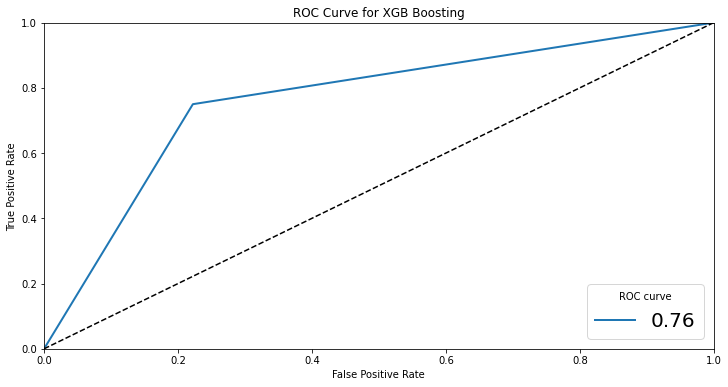

In [ ]:
# plot ROC curve

from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_xgb)
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--") #"k--" -> dashed line 
    plt.axis([0,1,0,1])
    plt.legend(title = "ROC curve",loc="lower right",fontsize = 20)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr,label = round(roc_xgb,2))
plt.title("ROC Curve for XGB Boosting");

Model Comparison

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 1, random_state = 0)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_pred

In [ ]:
lr_acc = accuracy_score(y_test, lr_pred )
lr_prec = precision_score(y_test, lr_pred )
lr_recall = recall_score(y_test, lr_pred )
lr_roc = roc_auc_score(y_test, lr_pred )
lr_f1 = f1_score(y_test, lr_pred )

print("Accuracy score:",lr_acc)
print("Precision score:",lr_prec)
print("Recall score:",lr_recall)
print("F1-score:",lr_f1)
print("AUC score:",lr_roc)

Accuracy score: 0.7021276595744681
Precision score: 0.6153846153846154
Recall score: 0.8
F1-score: 0.6956521739130435
AUC score: 0.7148148148148148


In [ ]:
#1. Random Forest

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train,y_train)

RF_pred = RF_model.predict(X_test)
RF_acc = accuracy_score(y_test, RF_pred )
RF_prec = precision_score(y_test, RF_pred )
RF_recall = recall_score(y_test, RF_pred )
RF_roc = roc_auc_score(y_test, RF_pred )
RF_f1 = f1_score(y_test, RF_pred )

print("Accuracy score:",RF_acc)
print("Precision score:",RF_prec)
print("Recall score:",RF_recall)
print("F1-score:",RF_f1)
print("AUC score:",RF_roc)

Accuracy score: 0.723404255319149
Precision score: 0.6521739130434783
Recall score: 0.75
F1-score: 0.6976744186046512
AUC score: 0.7268518518518519


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
#2. Support vector Machine

from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)
svm_model.predict(X_test)

svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred )
svm_prec = precision_score(y_test, svm_pred )
svm_recall = recall_score(y_test, svm_pred )
svm_roc = roc_auc_score(y_test, svm_pred )
svm_f1 = f1_score(y_test, svm_pred )

print("Accuracy score:",svm_acc)
print("Precision score:",svm_prec)
print("Recall score:",svm_recall)
print("F1-score:",svm_f1)
print("AUC score:",svm_roc)

Accuracy score: 0.7446808510638298
Precision score: 0.7
Recall score: 0.7
F1-score: 0.7
AUC score: 0.7388888888888888


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#model comparison table

performance= [{'Methods': 'XGBoost', 'Accuracy': acc_xgb, 'Precision':prec_xgb,'Recall':recall_xgb,'F1-Score':f1_xgb,'AUC score':roc_xgb},
              {'Methods': 'Logistic Regression', 'Accuracy': lr_acc, 'Precision':lr_prec,'Recall':lr_recall,'F1-Score':lr_f1,'AUC score':lr_roc},  
              {'Methods': 'Support Vector Machine', 'Accuracy': svm_acc, 'Precision':svm_prec,'Recall':svm_recall,'F1-Score':svm_f1,'AUC score':svm_roc}, 
              {'Methods': 'Random Forest', 'Accuracy': RF_acc, 'Precision':RF_prec,'Recall':RF_recall,'F1-Score':RF_f1,'AUC score':RF_roc}
              ]
df_performance = pd.DataFrame(performance)
df_performance

,Methods,Accuracy,Precision,Recall,F1-Score,AUC score
0,XGBoost,0.765957,0.714286,0.75,0.731707,0.763889
1,Logistic Regression,0.702128,0.615385,0.80,0.695652,0.714815
2,Support Vector Machine,0.744681,0.700000,0.70,0.700000,0.738889
3,Random Forest,0.723404,0.652174,0.75,0.697674,0.726852


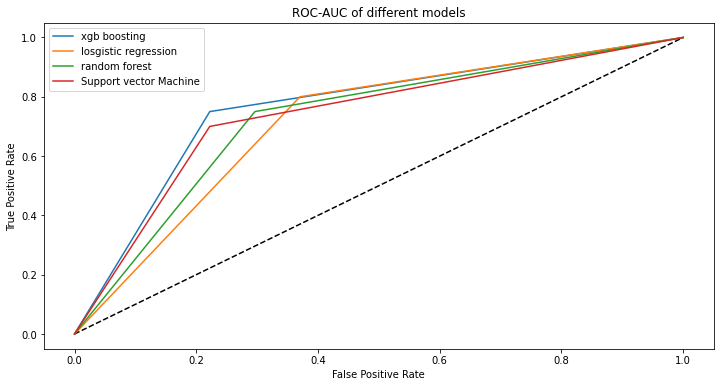

In [ ]:
#ROC Curve across all models
from sklearn.metrics import roc_curve

fpr1 , tpr1, thresholds1 = roc_curve(y_test, pred_xgb)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, lr_pred)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, RF_pred)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, svm_pred)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "xgb boosting")
plt.plot(fpr2, tpr2, label= "losgistic regression")
plt.plot(fpr3, tpr3, label= "random forest")
plt.plot(fpr4, tpr4, label= "Support vector Machine")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC-AUC of different models')
plt.show()

In [ ]:
#1.correlation matrix between features and disease

cor = df_merge.corr(method='pearson')
cor

,Acidobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Tenericutes,Verrucomicrobia,Candidatus_Saccharibacteria,Deinococcus_Thermus,Synergistetes,disease
Acidobacteria,1.000000,-0.018043,0.084096,-0.072034,-0.026063,-0.031724,-0.004883,-0.006832,0.004060,-0.015165,-0.011161,-0.005727,-0.057540
Actinobacteria,-0.018043,1.000000,-0.195297,0.114995,0.009076,0.006661,-0.030857,-0.012329,-0.008294,0.024432,0.148777,0.017253,0.009248
Bacteroidetes,0.084096,-0.195297,1.000000,-0.785156,-0.173251,-0.427205,-0.146949,-0.058593,-0.168762,-0.115176,-0.005368,-0.067161,-0.287537
Firmicutes,-0.072034,0.114995,-0.785156,1.000000,-0.003767,-0.147384,0.060956,0.099182,-0.036940,0.044556,0.050846,0.040700,0.106956
Fusobacteria,-0.026063,0.009076,-0.173251,-0.003767,1.000000,0.110958,0.580259,-0.030487,-0.058417,-0.033911,-0.095116,-0.027836,0.107720
Proteobacteria,-0.031724,0.006661,-0.427205,-0.147384,0.110958,1.000000,0.043432,-0.035546,-0.067749,0.043896,-0.062537,0.026925,0.299058
Spirochaetes,-0.004883,-0.030857,-0.146949,0.060956,0.580259,0.043432,1.000000,-0.006062,-0.011461,-0.013410,-0.018908,0.017367,0.064695
Tenericutes,-0.006832,-0.012329,-0.058593,0.099182,-0.030487,-0.035546,-0.006062,1.000000,-0.010428,-0.017760,-0.026456,-0.013250,0.090520
Verrucomicrobia,0.004060,-0.008294,-0.168762,-0.036940,-0.058417,-0.067749,-0.011461,-0.010428,1.000000,0.220519,-0.023745,0.047130,0.057317
Candidatus_Saccharibacteria,-0.015165,0.024432,-0.115176,0.044556,-0.033911,0.043896,-0.013410,-0.017760,0.220519,1.000000,-0.029783,-0.015467,0.141374


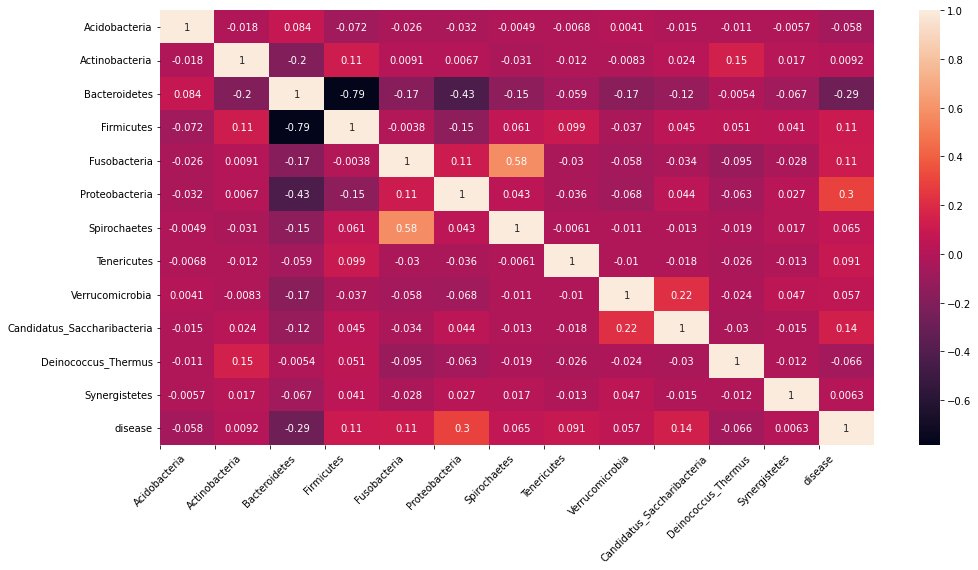

In [ ]:
#plot correlation coefficient of features and variables
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(16,8))
heatmap = sn.heatmap(cor,annot=True)
plt.xticks(range(df_merge.shape[1]), df_merge.columns, rotation=45)
plt.show()

In [ ]:
#feature importance analysis
XGB = XGBClassifier(random_state=60)
XGB.fit(X_train,y_train)
XGB_importance = XGB.feature_importances_
indices = np.argsort(XGB_importance)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
feature_imp = pd.Series(XGB.feature_importances_).sort_values(ascending=False)
feature_imp

5     0.217284
2     0.129692
3     0.128141
8     0.113789
4     0.098712
9     0.090006
1     0.085999
10    0.083040
11    0.053336
7     0.000000
6     0.000000
0     0.000000
dtype: float32

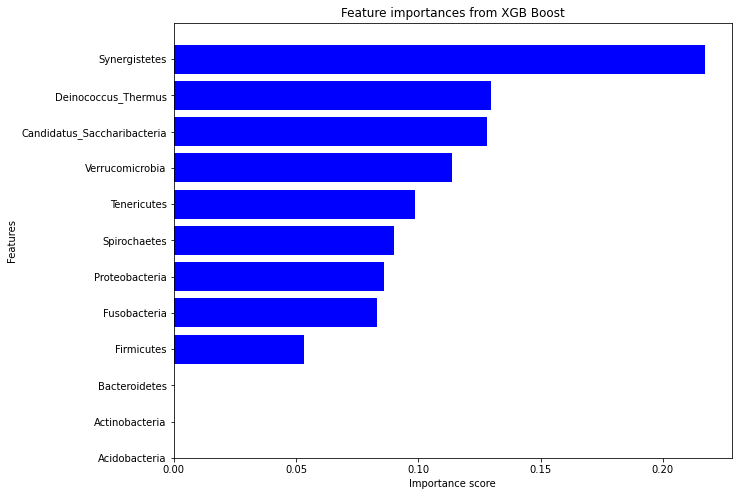

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Feature importances from XGB Boost")
plt.barh(range(X_train.shape[1]), XGB_importance[indices],
       color="b",  align="center")
plt.yticks(range(X_train.shape[1]), df_merge.columns[0:-1])
plt.ylim([0,X_train.shape[1]])
plt.xticks()
plt.xlabel('Importance score'); 
plt.ylabel('Features'); 
plt.show()